# Predecir el Radio del planeta y Temperatura de equilibrio

## Visualizamos los datos

In [16]:
import pandas as pd
df = pd.read_csv('data/cumulative.csv')
print(df)

      rowid     kepid kepoi_name   kepler_name koi_disposition  \
0         1  10797460  K00752.01  Kepler-227 b       CONFIRMED   
1         2  10797460  K00752.02  Kepler-227 c       CONFIRMED   
2         3  10811496  K00753.01           NaN  FALSE POSITIVE   
3         4  10848459  K00754.01           NaN  FALSE POSITIVE   
4         5  10854555  K00755.01  Kepler-664 b       CONFIRMED   
...     ...       ...        ...           ...             ...   
9559   9560  10031643  K07984.01           NaN  FALSE POSITIVE   
9560   9561  10090151  K07985.01           NaN  FALSE POSITIVE   
9561   9562  10128825  K07986.01           NaN       CANDIDATE   
9562   9563  10147276  K07987.01           NaN  FALSE POSITIVE   
9563   9564  10156110  K07989.01           NaN  FALSE POSITIVE   

     koi_pdisposition  koi_score  koi_fpflag_nt  koi_fpflag_ss  koi_fpflag_co  \
0           CANDIDATE      1.000              0              0              0   
1           CANDIDATE      0.969             

## Interpretamos datos

In [17]:
print(df.columns)

Index(['rowid', 'kepid', 'kepoi_name', 'kepler_name', 'koi_disposition',
       'koi_pdisposition', 'koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss',
       'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_period_err1',
       'koi_period_err2', 'koi_time0bk', 'koi_time0bk_err1',
       'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2',
       'koi_duration', 'koi_duration_err1', 'koi_duration_err2', 'koi_depth',
       'koi_depth_err1', 'koi_depth_err2', 'koi_prad', 'koi_prad_err1',
       'koi_prad_err2', 'koi_teq', 'koi_teq_err1', 'koi_teq_err2', 'koi_insol',
       'koi_insol_err1', 'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num',
       'koi_tce_delivname', 'koi_steff', 'koi_steff_err1', 'koi_steff_err2',
       'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad',
       'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec', 'koi_kepmag'],
      dtype='object')


## Vemos que columnas relevantes contienen valores vacias (tambien que se puedan predecir usando regresion lineal)

### koi_teq (temperatura de equilibrio)

In [18]:
print(df['koi_teq'].isna().sum())

363


## Todas las columnas con valores nulos

In [19]:
nulos_por_columna = df.isna().sum()
print(nulos_por_columna)

rowid                   0
kepid                   0
kepoi_name              0
kepler_name          7270
koi_disposition         0
koi_pdisposition        0
koi_score            1510
koi_fpflag_nt           0
koi_fpflag_ss           0
koi_fpflag_co           0
koi_fpflag_ec           0
koi_period              0
koi_period_err1       454
koi_period_err2       454
koi_time0bk             0
koi_time0bk_err1      454
koi_time0bk_err2      454
koi_impact            363
koi_impact_err1       454
koi_impact_err2       454
koi_duration            0
koi_duration_err1     454
koi_duration_err2     454
koi_depth             363
koi_depth_err1        454
koi_depth_err2        454
koi_prad              363
koi_prad_err1         363
koi_prad_err2         363
koi_teq               363
koi_teq_err1         9564
koi_teq_err2         9564
koi_insol             321
koi_insol_err1        321
koi_insol_err2        321
koi_model_snr         363
koi_tce_plnt_num      346
koi_tce_delivname     346
koi_steff   

## eliminamos datos con muchos valores nulos

In [20]:
df = df[df.isnull().mean(axis=1) < 0.5]  
nulos_por_columna = df.isna().sum()
print(nulos_por_columna)

rowid                   0
kepid                   0
kepoi_name              0
kepler_name          6908
koi_disposition         0
koi_pdisposition        0
koi_score            1206
koi_fpflag_nt           0
koi_fpflag_ss           0
koi_fpflag_co           0
koi_fpflag_ec           0
koi_period              0
koi_period_err1        91
koi_period_err2        91
koi_time0bk             0
koi_time0bk_err1       91
koi_time0bk_err2       91
koi_impact              0
koi_impact_err1        91
koi_impact_err2        91
koi_duration            0
koi_duration_err1      91
koi_duration_err2      91
koi_depth               0
koi_depth_err1         91
koi_depth_err2         91
koi_prad                0
koi_prad_err1           0
koi_prad_err2           0
koi_teq                 0
koi_teq_err1         9201
koi_teq_err2         9201
koi_insol               0
koi_insol_err1          0
koi_insol_err2          0
koi_model_snr           0
koi_tce_plnt_num      255
koi_tce_delivname     255
koi_steff   

## Hacemos un mapa de correlacion para ver que tan relacionadas estan las variables entre si

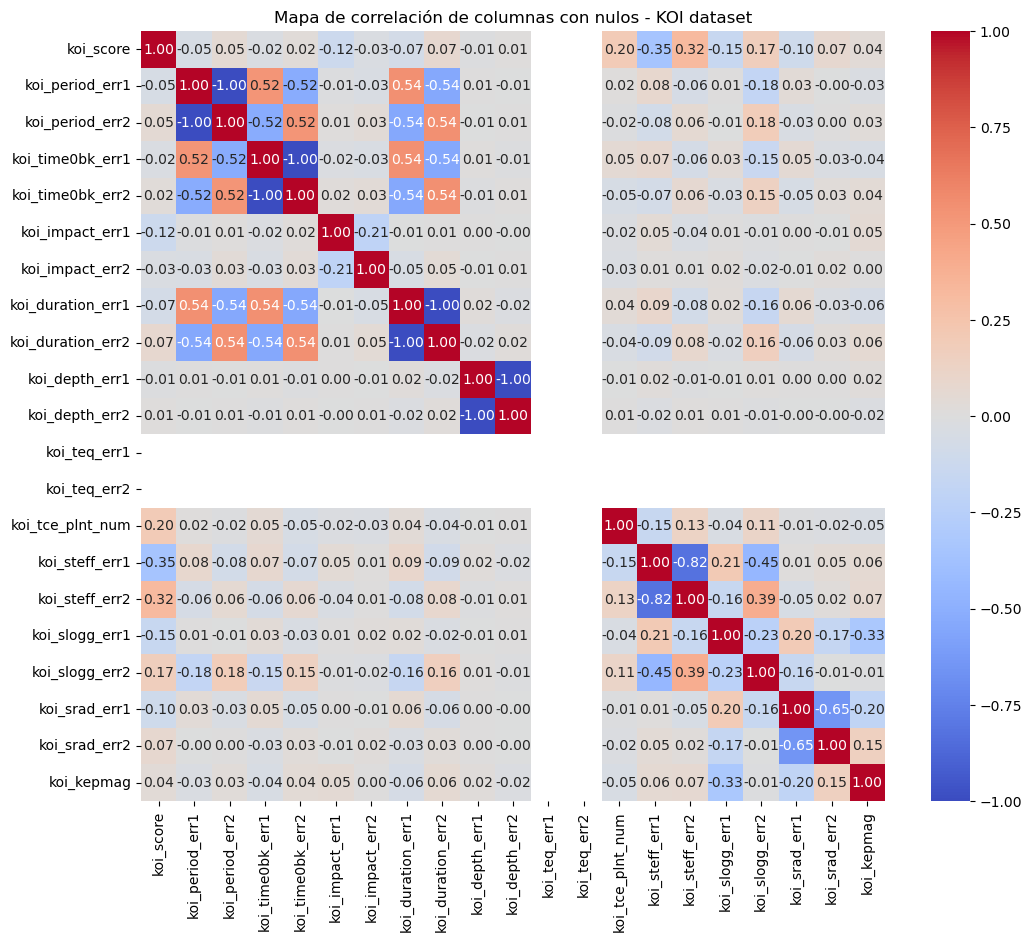

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df_num = df[num_cols]

cols_with_nulos = df_num.columns[df_num.isna().sum() > 0]
df_num = df_num[cols_with_nulos]

df_num_filled = df_num.fillna(df_num.mean())

corr_matrix = df_num_filled.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Mapa de correlación de columnas con nulos - KOI dataset")
plt.show()

#### Podemos ver que muchas variables dependen de otras (Tienen una correlacion mayor a |0.80| )

## Hacemos feature selection para koi_prad 

In [29]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df_num = df[num_cols]
df_num_filled = df_num.fillna(df_num.mean())
corr_matrix = df_num_filled.corr(method='pearson')
corr_koi_prad = corr_matrix['koi_prad'].sort_values(ascending=False)

print("Correlaciones con koi_prad:")
print(corr_koi_prad)

Correlaciones con koi_prad:
koi_prad             1.000000
koi_prad_err1        0.722604
koi_impact           0.677380
koi_srad             0.056669
koi_fpflag_nt        0.045008
koi_duration         0.036573
koi_srad_err1        0.035644
koi_time0bk          0.034992
rowid                0.028485
koi_impact_err1      0.027604
koi_period_err1      0.023354
koi_duration_err1    0.021400
koi_slogg_err2       0.018027
koi_time0bk_err1     0.012056
ra                   0.008716
koi_period           0.005135
kepid                0.003681
koi_insol_err1       0.003314
dec                  0.003037
koi_insol            0.002989
koi_depth            0.002558
koi_depth_err1       0.001541
koi_fpflag_ss        0.001429
koi_teq             -0.001249
koi_depth_err2      -0.001541
koi_model_snr       -0.001746
koi_insol_err2      -0.002173
koi_slogg_err1      -0.002665
koi_tce_plnt_num    -0.004981
koi_score           -0.007266
koi_fpflag_ec       -0.010148
koi_fpflag_co       -0.011491
koi_time0bk_

## Mejores variables para koi_teq

koi_insol - 0.4227  
koi_srad - 0.4399  
koi_slogg - 0.5274  

## Graficacion de datos con las variables

## Implementacion del Modelo

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Variables predictoras y objetivo
X = df[['koi_insol', 'koi_srad', 'koi_slogg']]
y = df['koi_teq']

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

# Modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)

# Resultados del modelo
print("Coeficientes:")
for var, coef in zip(X_train.columns, model.coef_):
    print(f"{var}: {coef:.4f}")

print(f"\nIntercepto: {model.intercept_:.4f}")

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# -------------------------------------------------
# CASOS DE PRUEBA MANUALES
# -------------------------------------------------
# Crear nuevos ejemplos para predecir 

test_case_corrected = pd.DataFrame({
    'koi_insol': [93.59],
    'koi_srad': [0.927],
    'koi_slogg': [4.467],  
    'koi_time0bk': [170.53]
})

prediction = model.predict(test_case_corrected)
print(f"Predicción corregida: {prediction[0]:.2f} K")


Coeficientes:
koi_insol: 0.0015
koi_srad: -0.6716
koi_slogg: -887.5840
koi_time0bk: -4.0216

Intercepto: 5568.2043
Predicción corregida: 917.08 K
